# Data Visualization

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("details.csv")

In [6]:
df.head()

,id,campaign_url,title_wc,short_wc,story_wc,collected_amt,donation_target_amt,is_org,img_cnt,vid_cnt,...,update_cnt,reward_cnt,max_reward,min_reward,total_weight,median_weight,avg_weight,fb_reaction_count,fb_comment_count,fb_share_count
0,0,https://kitabisa.com/savemugo,5.0,21.0,719.0,9713389.0,10400000,0.0,21.0,1.0,...,2.0,4.0,5000000.0,100000.0,0.398104,0.000000,0.000131,92,18,4
1,1,https://kitabisa.com/senyumuntukfatur,3.0,19.0,246.0,6432905.0,15000000,0.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.148271,0.000000,0.000185,6,1,7
2,2,https://kitabisa.com/musholahampirroboh,4.0,15.0,186.0,7257111.0,30000000,0.0,12.0,0.0,...,9.0,0.0,0.0,0.0,0.183283,0.001464,0.000291,1064,98,136
3,3,https://kitabisa.com/infifteenityspecial,7.0,22.0,248.0,50118.0,59478000,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.124878,0.000000,0.000113,3,1,8
4,4,https://kitabisa.com/buahhati,6.0,22.0,409.0,4075851.0,500000000,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.268064,0.000000,0.000186,47,1,16


In [7]:
bins = [0, 500000 , 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 1000000000, 5000000000]

In [8]:
groups = df.groupby(pd.cut(df.collected_amt, bins))

In [9]:
df_binned = pd.DataFrame(groups.mean().fb_share_count)

In [12]:
df_binned = df_binned.reset_index()

In [13]:
df_binned

,collected_amt,fb_share_count
0,"(0, 500000]",9.808696
1,"(500000, 1000000]",16.404762
2,"(1000000, 5000000]",20.898405
3,"(5000000, 10000000]",33.576520
4,"(10000000, 50000000]",91.839937
5,"(50000000, 100000000]",209.343750
6,"(100000000, 500000000]",707.451613
7,"(500000000, 1000000000]",1076.900000
8,"(1000000000, 5000000000]",6657.000000


In [46]:
columns = ['0 - Rp500.000,-', 
       '> Rp500.000, - Rp1.000.000,-', 
       '>Rp1.000.000,- - Rp5.000.000,-',
       '>Rp5.000.000,- - Rp10.000.000,-',
       '>Rp10.000.000,- - Rp50.000.000,-',
       '>Rp50.000.000,- - Rp100.000.000,-',
       '>Rp100.000.000,- - Rp500.000.000,-',
       '>Rp500.000.000,- - Rp1.000.000.000,-',
       '>Rp1.000.000.000,- - Rp5.000.000.000,-']

In [67]:
colors = ["#999999"]*len(bins)
target_bin = ''
# Set stand out color
for i in xrange(len(colors)):
    if 100000000 in list(df_binned['collected_amt'])[i]:
        colors[i] = "#2ecc71"
        target_bin = columns[i]
        target_bin_avg = df_binned['fb_share_count'][i]
        break

>Rp50.000.000,- - Rp100.000.000,-
209.34375


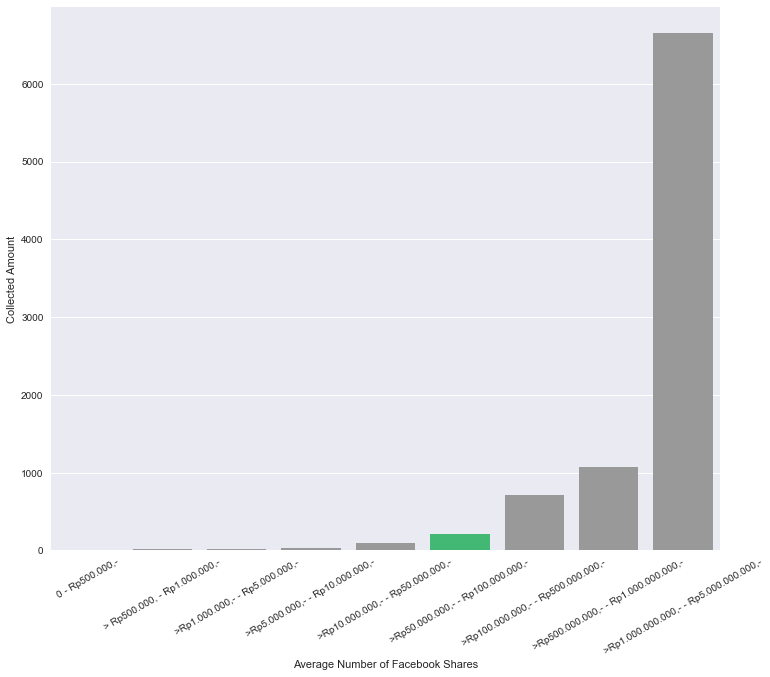

In [68]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.barplot(x='collected_amt', y='fb_share_count', data=df_binned, palette=colors)
ax.set(xlabel='Average Number of Facebook Shares', ylabel='Collected Amount')
ax.set_xticklabels(columns,rotation=30)
plt.show()